In [71]:
import pymc3 as pm
import numpy as np
import theano
from collections import defaultdict
import seaborn as sns

sns.set_context('poster')
sns.set_style('white')
%matplotlib inline

In [79]:
# Set up a pilot experiment with n=2
loc = 10
size = 2

vals = np.random.normal(loc=loc, scale=1, size=size)
print(vals)
obs = theano.shared(vals)

with pm.Model() as model:
    mu = pm.Uniform('mu', lower=-10000, upper=10000)
    sd = pm.Exponential('sd', lam=10)
    likelihood = pm.Normal('like', mu=mu, sd=sd, observed=obs)
    trace = pm.sample(draws=2000, step=pm.NUTS(), njobs=None)

[  9.65460269  12.46556015]
Applied interval-transform to mu and added transformed mu_interval_ to model.
Applied log-transform to sd and added transformed sd_log_ to model.
 [-----------------100%-----------------] 2000 of 2000 complete in 6.4 sec

/Users/ericmjl/anaconda/envs/writing/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


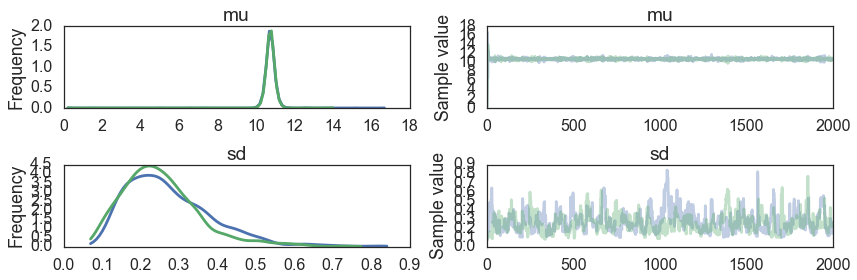

In [73]:
import matplotlib.pyplot as plt 

with model:
    pm.traceplot(trace)
    plt.legend()

In [74]:
def hpd_range(trace, key, perc=95):
    lowperc = (100 - perc) / 2
    uppperc = 100 - (lowperc)
    lower, upper = np.percentile(trace[key], [lowperc, uppperc])
    rng = upper - lower
    return rng

def ratio_uncertainty_to_value(trace, key):
    # lower, upper = np.percentile(trace[key], [2.5, 97.5])
    density = hpd(trace, key)
    return density / np.mean(trace[key])



hpd_range(trace, 'mu'), ratio_uncertainty_to_value(trace, 'mu')

(0.84595713156340935, 0.078711405053010483)

In [75]:
# Now, let's add some data.
more_obs = np.concatenate([np.random.normal(loc=loc, scale=1, size=3),
                           vals],
                         axis=0)
print(more_obs)
obs = obs.set_value(more_obs)

[ 11.73565178   9.05701925   8.95051064  10.5956277   10.9234241 ]


 [-----------------100%-----------------] 2000 of 2000 complete in 9.8 sec

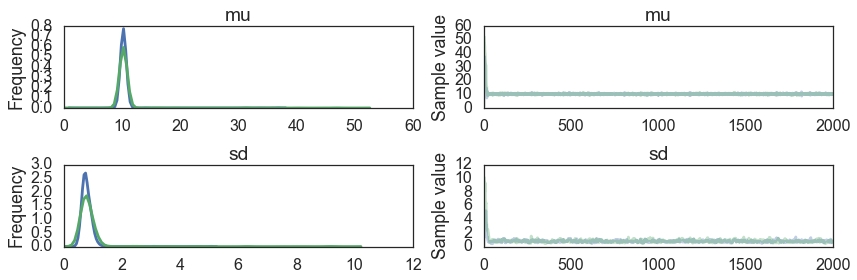

In [76]:
with model:
    trace = pm.sample(draws=2000, step=pm.NUTS(), njobs=None)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139247550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x138812550>]], dtype=object)

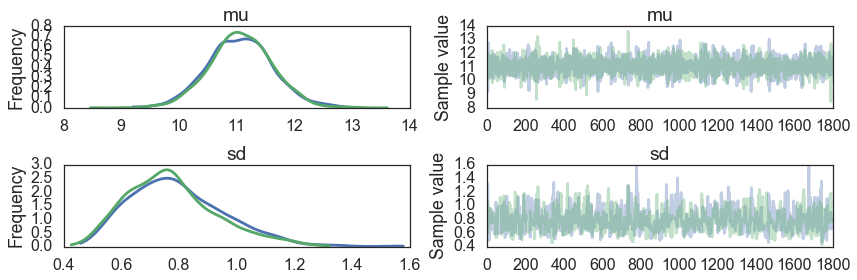

In [80]:
pm.traceplot(trace[200:])

In [77]:
hpd_range(trace, 'mu'), ratio_uncertainty_to_value(trace, 'mu')

(1.4992277589924008, 0.14404385735111361)